In [1]:
import scipy.integrate as spi
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

In [2]:
mu=0.02/(365.0)
R_0=17
sigma=1/(8.0)
gamma=1/(5.0)
beta_0=gamma*R_0
beta_1= 0.225
omega=2*np.pi/360
ND=200*365.0
TS=1.0
S0=0.06
E0=1e-3
I0=1e-3
INPUT = (S0, E0, I0)

def diff_eqs(t,z):  
    S,E,I=z
    beta=beta_0*(1-beta_1*np.cos(omega*t))
    #Y=np.zeros((3))
    #V = INP    
    return [mu - beta * S * I - mu * S, 
    beta * S * I - sigma * E - mu * E,
    sigma * E - gamma * I - mu * I]



t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)

#total_year=100
#S=np.zeros((int(total_year*365/ND),int(ND)+1))
#E=np.zeros((int(total_year*365/ND),int(ND)+1))
#I=np.zeros((int(total_year*365/ND),int(ND)+1))

RES= solve_ivp(diff_eqs,t_span=(0,ND),t_eval=t_range,y0=INPUT,method='LSODA')
#for i in range(int(total_year*365/ND)):
 #   print(i)
  #  t_start = i*ND; t_end = (i+1)*ND; t_inc = TS
   # t_range = np.arange(t_start, t_end+t_inc, t_inc)
    #RES= solve_ivp(diff_eqs,t_span=(i*ND,(i+1)*ND),t_eval=t_range,y0=INPUT,method='RK45')
    #S[i,:]=RES.y[0]
    #E[i,:]=RES.y[1]
    #I[i,:]=RES.y[2]
    #INPUT=(S[i,-1],E[i,-1],I[i,-1])
    #print(INPUT)


    

#Rec=1. - (RES[:,0]+RES[:,1]+RES[:,2])
#print RES




# Ploting

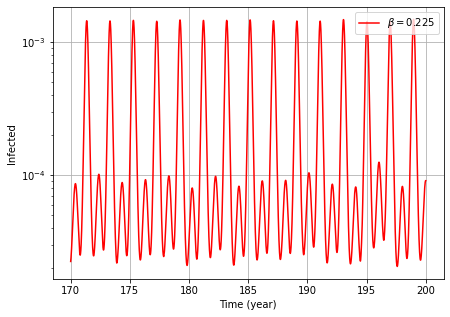

In [563]:
plt.figure(figsize=(7,5))
year=30
start=15000
end=20000
#plt.subplot(111)
#plt.plot(RES[:,0], '-g', label='Susceptibles')
#plt.title('Q2')
#plt.xlabel('Time')
#plt.ylabel('Susceptibles')
#plt.subplot(312)
#plt.plot(RES[:,1][start:end], '-m', label='Exposed')
plt.plot(RES.t[-365*year:]/365,RES.y[2][-365*year:], '-r',label='$\\beta = %0.3f$'%beta_1)
plt.xlabel('Time (year)')
plt.ylabel('Infected')
plt.legend(loc='upper right')
#plt.subplot(313)
#plt.plot(Rec, '-k', label='Recovereds')
#plt.xlabel('Time')
#plt.ylabel('Recovereds')
plt.grid()
plt.yscale('log')
#plt.savefig('beta=%0.3f.png'%beta_1,bbox_inches='tight',dpi=720)
plt.show()

# Bifurcation 

In [29]:
%%time
n=30
mu=0.02/(365.0)
R_0=17
sigma=1/8.0
gamma=1/5.0
beta_0=gamma*R_0
beta_1_list= np.arange(0,0.3,0.0001)
#beta_1_list=[0.22]
omega=np.pi/180
ND=200*365.0
TS=1.0
S0=0.06
E0=1e-3
I0=1e-3
INPUT = (S0, E0, I0)

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)



bifur=[]
for beta_1 in beta_1_list:
    print(beta_1)
    #if beta_1>0.22 and beta_1<0.26:
     #   n=20
      #  ND=30*365.0
       # t_start = 0.0; t_end = ND; t_inc = TS
        #t_range = np.arange(t_start, t_end+t_inc, t_inc)
    
    if beta_1>0.26:
        n=10
        ND=20*365.0
        t_start = 0.0; t_end = ND; t_inc = TS
        t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES=spi.odeint(diff_eqs,INPUT,t=t_range,tfirst=True)
    bifur.append(RES[-n*365:,2][argrelextrema(RES[-n*365:,2],np.greater)])
    #bifur.append(np.array(list(set(np.round(RES[-n*365:,2][argrelextrema(RES[-n*30:,2],np.greater)],decimals=10)))))

    #RES= solve_ivp(diff_eqs,t_span=(0,ND),y0=INPUT,t_eval=t_range,method='RK45')
    #bifur.append(np.array(list(set(np.round(RES.y[2][-n*30:][argrelextrema(RES.y[2][-n*30:],np.greater)],decimals=5)))))


0.0
0.0001
0.0002
0.00030000000000000003
0.0004
0.0005
0.0006000000000000001
0.0007
0.0008
0.0009000000000000001
0.001
0.0011
0.0012000000000000001
0.0013000000000000002
0.0014
0.0015
0.0016
0.0017000000000000001
0.0018000000000000002
0.0019
0.002
0.0021000000000000003
0.0022
0.0023
0.0024000000000000002
0.0025
0.0026000000000000003
0.0027
0.0028
0.0029000000000000002
0.003
0.0031000000000000003
0.0032
0.0033
0.0034000000000000002
0.0035
0.0036000000000000003
0.0037
0.0038
0.0039000000000000003
0.004
0.0041
0.004200000000000001
0.0043
0.0044
0.0045000000000000005
0.0046
0.0047
0.0048000000000000004
0.0049
0.005
0.0051
0.005200000000000001
0.0053
0.0054
0.0055000000000000005
0.0056
0.0057
0.0058000000000000005
0.0059
0.006
0.0061
0.006200000000000001
0.0063
0.0064
0.006500000000000001
0.0066
0.0067
0.0068000000000000005
0.006900000000000001
0.007
0.0071
0.007200000000000001
0.0073
0.0074
0.007500000000000001
0.0076
0.0077
0.0078000000000000005
0.0079
0.008
0.0081
0.0082
0.0083
0.0084000

In [30]:
tree=[]
for index,a in enumerate(beta_1_list):
    for item in bifur[index]:
        tree.append((a,item))

In [23]:
bifur[-1]

array([ 3.91442937e-03,  7.17236547e-09,  5.42663087e-09,  6.84181987e-09,
        6.74945577e-09,  8.49780450e-09,  1.33823250e-09, -9.26652075e-09,
       -3.93552545e-09, -1.19026189e-02,  5.13343897e-06,  2.13323143e-04,
        3.49637964e-03,  8.79780772e-09,  8.74259509e-09,  1.59440256e-09,
        1.70603793e-09,  1.61816548e-09])

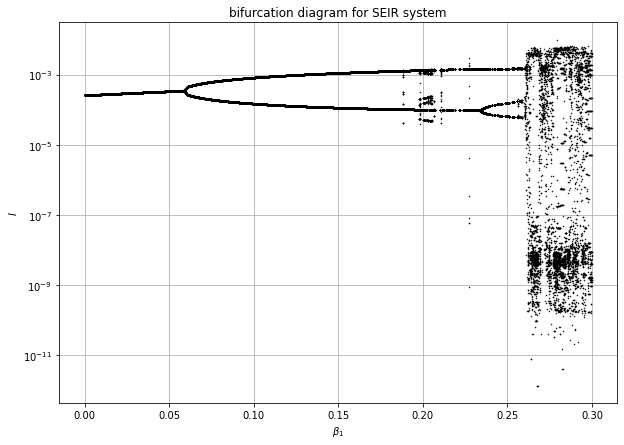

In [33]:
xt,yt=zip(*tree)
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot()
ax.grid()
#ax.set_facecolor('w')
ax.plot(xt,yt,'.k',ms=1,alpha=1)
ax.set_title('bifurcation diagram for SEIR system')
ax.set_xlabel('$\\beta_1$')
ax.set_ylabel('$I$')
plt.yscale('log')
plt.savefig('bifur3.png',bbox_inches='tight',dpi=720)